<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE 

A Variational Autoencoder (VAE) is a type of generative model that combines the principles of autoencoders and probabilistic modeling. VAEs are designed to learn a probabilistic mapping between high-dimensional input data and a lower-dimensional latent space, capturing meaningful representations of the input data. In a VAE, the encoder network maps input data to a distribution in the latent space, typically modeled as a Gaussian distribution. The decoder network then samples from this distribution to reconstruct the input data. Importantly, VAEs introduce a probabilistic element by enforcing that the latent space follows a specific probability distribution, usually a multivariate Gaussian. During training, VAEs maximize a variational lower bound on the log-likelihood of the data. This involves minimizing the reconstruction error, ensuring that the generated samples resemble the input data, and regularizing the distribution of the latent space to follow the desired probability distribution.

VAEs have applications in generative tasks, such as image and text generation, and are valued for their ability to generate diverse and realistic samples while providing a structured latent space that allows for interpolation and manipulation of data representations.

In [ ]:
# Install the library

!pip install rapidae

In [2]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models import VAE
from rapidae.models.base import Encoder_MLP, Decoder_MLP
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions

2024-01-29 01:01:22.949683: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 01:01:22.949713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 01:01:22.950439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 01:01:22.955362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 01:01:23.478821: W tensorflow/compiler/tf2

# Data

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized and flatten (since Dense layers are going to be used)
We also need to convert the labels into one-hot encoding.

In [3]:
# Load MNIST dataset
data = load_MNIST()

x_train = data["x_train"].reshape(data["x_train"].shape[0], -1) / 255
x_test = data["x_test"].reshape(data["x_test"].shape[0], -1) / 255

# Obtain number of clasess
n_classes = len(set(data["y_train"]))

# Convert labels to categorical
y_train = utils.to_categorical(data["y_train"], n_classes)
y_test = utils.to_categorical(data["y_test"], n_classes)

2024-01-29 01:01:24 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-01-29 01:01:25 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-01-29 01:01:25 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-01-29 01:01:25 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-01-29 01:01:25 [INFO]: Deleting MNIST data...


### Model

In this example we are using a vanilla MLP variational autoencoder. 

In [ ]:
# Model creation
model = VAE(input_dim=x_train.shape[1], 
            latent_dim=2,
            encoder=Encoder_MLP, 
            decoder=Decoder_MLP, 
            layers_conf=[64])

### Training

Define the training pipeline. You can fix some hyperparameters related to training (learning rate, batch size, numer of epochs, etc.). You can also pass a list of model callbacks.

In [5]:
pipe = TrainingPipeline(name='training_pipeline_mnist_mlp_vae', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=30, 
                        batch_size=128)

trained_model = pipe(x=x_train, y=x_train)

2024-01-29 01:01:25 [INFO]: +++ training_pipeline_mnist_mlp_vae +++
2024-01-29 01:01:25 [INFO]: Creating folder in ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-29_01-01-25


Epoch 1/30


2024-01-29 01:01:27.217477: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efb500029d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-29 01:01:27.217552: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-29 01:01:27.250963: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-29 01:01:27.433416: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-29 01:01:28.931086: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1038', 192 bytes spill stores, 196 bytes spill loads

I0000 00:00:1706486490.308323   41686 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most 


Epoch 1: loss improved from inf to 11.45996, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-29_01-01-25/model.weights.h5
469/469 - 8s - 17ms/step - kl_loss: 0.9421 - loss: 11.4600 - reconstruction_loss: 10.5179
Epoch 2/30

Epoch 2: loss improved from 11.45996 to 8.55011, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-29_01-01-25/model.weights.h5
469/469 - 1s - 1ms/step - kl_loss: 0.2648 - loss: 8.5501 - reconstruction_loss: 8.2853
Epoch 3/30

Epoch 3: loss improved from 8.55011 to 8.50634, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-29_01-01-25/model.weights.h5
469/469 - 1s - 1ms/step - kl_loss: 0.3510 - loss: 8.5063 - reconstruction_loss: 8.1554
Epoch 4/30

Epoch 4: loss improved from 8.50634 to 8.47719, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-29_01-01-25/model.weights.h5
469/469 - 1s - 2ms/step - kl_loss: 0.4333 - loss: 8.4772 - reconstruction_loss: 8.0439
Epoch 5/30

Epoch 5: loss impr

2024-01-29 01:01:53 [INFO]: Best model restored


### Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


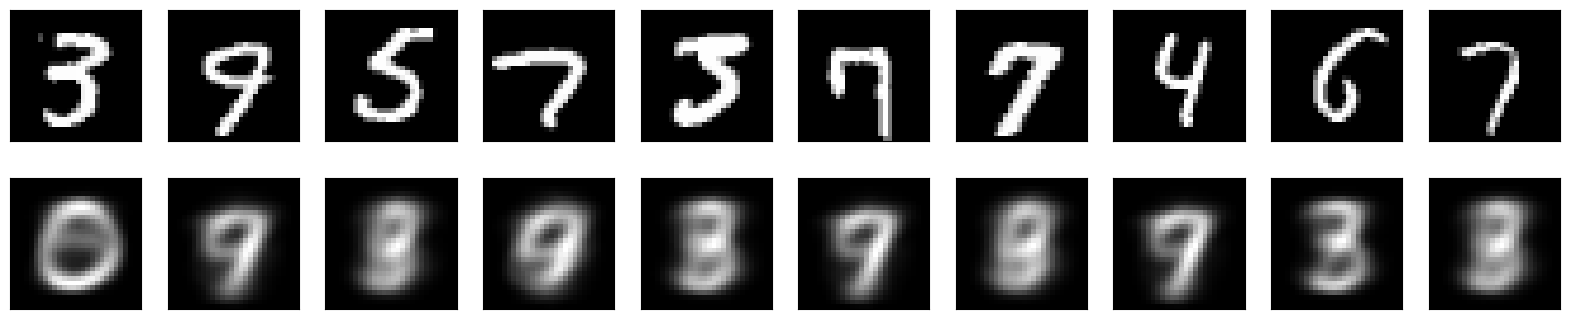

In [6]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['recon'])